In [1]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import pandas as pd
import numba
from numba import njit, jit
from statistics import mean
from sklearn.datasets.samples_generator import make_blobs
from sklearn.base import BaseEstimator, ClusterMixin, TransformerMixin

class Kmeans(BaseEstimator, ClusterMixin, TransformerMixin):               # Input: processed dataset, Output: clustered data (kmeans, kmeans++)
    def __init__(self, inits=10, k=8, maxit=300, method="++", tol = 1e-3):
        
        self.labels_ = None
        self.cluster_centers_ = None
        self._inits = inits
        self._k = k
        self._maxit = maxit
        self._method = method
        self._tol = tol
       # dot = np.random.choice(range(len(self._data)), self._k, replace=False)
        #self._clusters = self._data[dot]
   

    def fit(self,data):
        self._data = data
        best_clust = float('inf')
        
        for i in (range(self._inits)):
            
            if self._method == "rng": # random centers are choosen
                #print("rng")
                dot = np.random.choice(range(len(self._data)), self._k, replace=False)
                self.cluster_centers_ = self._data[dot]
            elif self._method == "++": # kmeans++ is initiated
                #print("++")
                dot = np.random.choice(len(self._data), replace=False) # random startpunkt
                clusters = np.array([self._data[dot]])
                pointer = np.array([])
                for i in range (self._k-1):
                    D = np.array([])
            
                    for j in range (len(self._data)):
                        D = np.append(D,np.min(np.sum((self._data[j]-clusters)**2, axis = 1)))
                
                    pointer = np.append(pointer, D, axis = 0) 
            
                    p = D/np.sum(D)
                    cummulative_p = np.cumsum(p)
            
                    r = random.random()
                    ind = np.where(cummulative_p >= r)[0][0]
            
                    clusters = np.append(clusters,[self._data[ind]], axis = 0)
                self.cluster_centers_ = clusters
            else:
                raise AttributeError("No valid method")

            old_centroids = None
            
            for i in range(self._maxit):
                old_centroids = self.cluster_centers_.copy()
                clusters = np.expand_dims(self.cluster_centers_, axis=1)
                data = np.expand_dims(self._data, axis=0)
                eucl = np.linalg.norm(clusters-data, axis=2) # euclidean dist by using integrated numpy function
                self.labels_ = np.argmin(eucl, axis = 0)
                for i in range(self._k): # range of clusters
                    position = np.where(self.labels_ == i) # position im array bestimmen und dann die entspechenden punkte aus data auslesen
                    self.cluster_centers_[i] = self._data[position].mean(axis = 0)
                    #out = pd.DataFrame(data[np.argwhere(dist == i)].squeeze())
                overall_quality = np.sum(np.min(eucl.T, axis=1))
                if overall_quality < best_clust:
                    best_clust = overall_quality
                    best_dist = self.labels_
                    best_centers = self.cluster_centers_
                if np.linalg.norm(self.cluster_centers_ - old_centroids) < self._tol:
                    break
            self.cluster_centers_ = best_centers
            self.labels_ = best_dist
            self.inertia_ = best_clust
                
        return self
   
    
    def predict(self, X):
        clusters = np.expand_dims(self.cluster_centers_, axis=1)
        data = np.expand_dims(X, axis=0)
        eucl = np.linalg.norm(clusters-data, axis=2) # euclidean dist by using integrated numpy function
        self.labels_ = np.argmin(eucl, axis = 0)
        return self.labels_ #returns the cluster with minimum distance
    
    def transform(self, X):
        clusters = np.expand_dims(self.cluster_centers_, axis=1)
        data = np.expand_dims(X, axis=0)
        eucl = np.linalg.norm(clusters-data, axis=2)
        return eucl.T

In [2]:
### importieren
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets.samples_generator import make_blobs #random data generator
import pandas as pd
import time

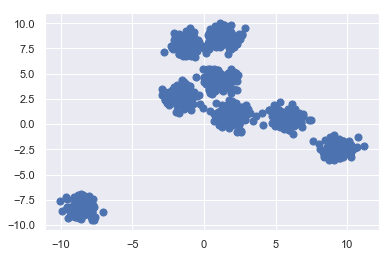

In [3]:
#generate data
X, y_true = make_blobs(n_samples=1000, centers=8,
                       cluster_std=0.60, random_state=0, )
plt.scatter(X[:, 0], X[:, 1], s=50);

# init =1

In [4]:
liste = []
lib = Kmeans(inits=1, method="rng")
for i in range(100):
    start = time.time()
    lib.fit(X)
    end = time.time()
    liste.append(end-start)
   # print(end-start)
print( "Time:"+ str(np.sum(liste)))
print( "Mean Time:"+ str(np.mean(liste)))

Time:0.6350405216217041
Mean Time:0.006350405216217041


# init =2

In [5]:
liste = []
lib = Kmeans(inits=2, method="rng")
for i in range(100):
    start = time.time()
    lib.fit(X)
    end = time.time()
    liste.append(end-start)
   # print(end-start)
print( "Time:"+ str(np.sum(liste)))
print( "Mean Time:"+ str(np.mean(liste)))

/anaconda3/envs/igem/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: Mean of empty slice.
/anaconda3/envs/igem/lib/python3.6/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Time:1.7449092864990234
Mean Time:0.017449092864990235


# init =10

In [6]:
liste = []
lib = Kmeans(inits=10, method="rng")
for i in range(100):
    start = time.time()
    lib.fit(X)
    end = time.time()
    liste.append(end-start)
   # print(end-start)
print( "Time:"+ str(np.sum(liste)))
print( "Mean Time:"+ str(np.mean(liste)))

/anaconda3/envs/igem/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: Mean of empty slice.


Time:7.288015842437744
Mean Time:0.07288015842437744


In [7]:
from wwdk import cluster as cl

In [8]:
liste = []
lib = cl.Kmeans(inits=1, method="rng")
for i in range(100):
    start = time.time()
    lib.fit(X)
    end = time.time()
    liste.append(end-start)
   # print(end-start)
print( "Time:"+ str(np.sum(liste)))
print( "Mean Time:"+ str(np.mean(liste)))

Time:0.7509567737579346
Mean Time:0.007509567737579346


In [9]:
import sklearn.cluster as sk
sk_kmeans = sk.KMeans(init="random",n_init=1)
liste = []
for i in range(100):
    start = time.time()
    sk_kmeans.fit(X)
    end = time.time()
    liste.append(end-start)
    #print(end-start)
print( "Time:"+ str(np.sum(liste)))
print( "Mean Time:"+ str(np.mean(liste)))

Time:0.2862858772277832
Mean Time:0.002862858772277832


In [10]:
lib.inertia_

1190.6528818048373

In [11]:
X.dtype

dtype('float64')

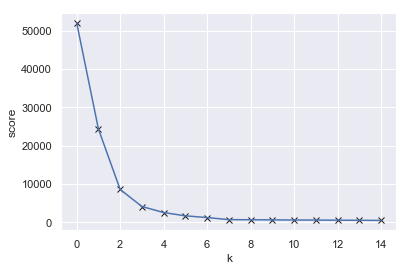

In [12]:
from wwdk import cluster as cl
liste = []
for i in range(15):
    lib = cl.Kmeans(inits=10, method="rng", k=i+1)
    lib.fit(X)
    liste.append(lib.inertia_)
    #print(lib.inertia_)
plt.plot(liste, "kx")
plt.plot(liste)
plt.xlabel("k")
plt.ylabel("score")
plt.show()

In [13]:
from wwdk import data as d

In [14]:
pbmc = d.Loader("http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz")

In [15]:
def plot(data, dist, clusters,k):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i in range(k):
        graph = pd.DataFrame(data[np.argwhere(dist == i)].squeeze())
        center = pd.DataFrame(clusters[i]).T
        #print("Cluster"+ str(i) +  " -- Assigned Points \n" + str(graph))
        ax.plot(graph[0], graph[1], "o")
        ax.plot(center[0],center[1], "kx")
        ax.annotate("Cluster " + str(i), xy = (center[0],center[1])
            )
    plt.show

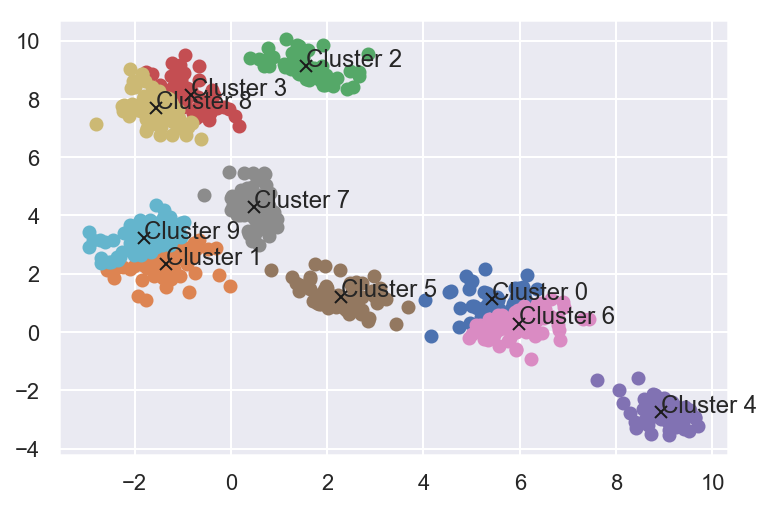

In [16]:
%config InlineBackend.figure_format = "retina"
plot(X,lib.labels_, lib.cluster_centers_, 10)

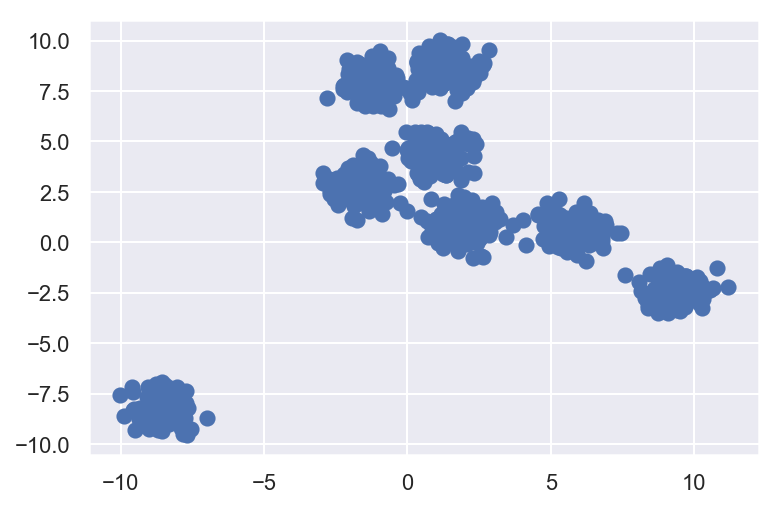

In [17]:

plt.scatter(X[:, 0], X[:, 1], s=50);

In [18]:
from sklearn.datasets import load_iris
data = load_iris()

In [62]:
iris_data = data["data"]


In [20]:
import sklearn.cluster as sk
sk_kmeans = sk.KMeans(init="random")
from wwdk import cluster as cl
wwdk_kmeans = cl.Kmeans(method="rng")

/anaconda3/envs/igem/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


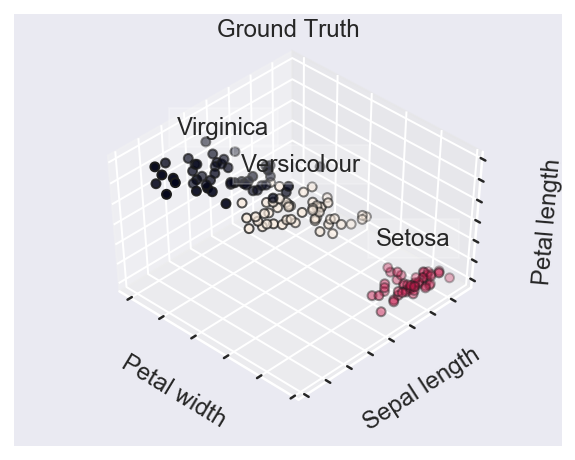

In [21]:
%config InlineBackend.figure_format = "retina"
from mpl_toolkits.mplot3d import Axes3D
#sk_kmeans.fit(iris_data)
#labels = sk_kmeans.labels_
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
y = data.target
for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(iris_data[y == label, 3].mean(),
              iris_data[y == label, 0].mean(),
            iris_data[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(iris_data[:, 3], iris_data[:, 0], iris_data[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

In [22]:
wwdk_kmeans.fit_transform(iris_data).shape

(150, 8)

In [23]:
sk_kmeans.fit_transform(iris_data).shape

(150, 8)

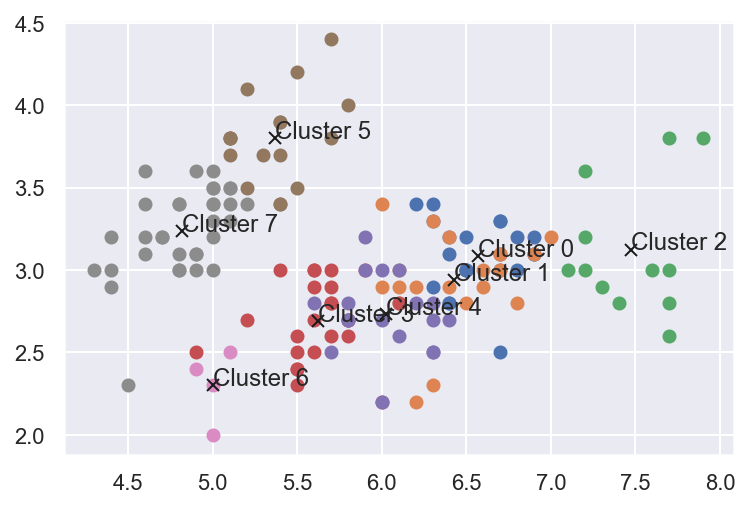

In [24]:
plot(iris_data, wwdk_kmeans.labels_, wwdk_kmeans.cluster_centers_, 8)

In [144]:
pkmn = pd.read_csv('/Users/benedict/Desktop/Programmieren/Bioinfoprojekt/project-04-group-04/Pokemon/pokemon.csv', index_col=0)

In [145]:
atk_def = np.array(pkmn[["Attack","Defense"]])

In [146]:
pkm_clust = cl.Kmeans(k=3)
pkm_clust.fit(atk_def)

Kmeans(inits=None, k=None, maxit=None, method=None, tol=None)

In [147]:
plot(atk_def, pkm_clust.labels_, pkm_clust.cluster_centers_, 3)

NameError: name 'plot' is not defined

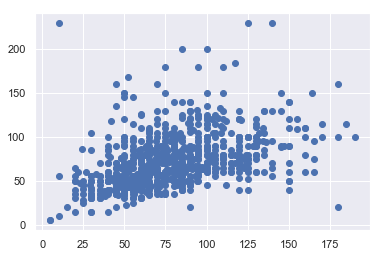

In [148]:
plt.scatter(atk_def[:,0],atk_def[:,1])


In [149]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.manifold import TSNE

In [150]:
test = pkmn[["Attack","Defense","Sp. Atk", "Sp. Def","Speed", "Type 1"]]
norm = preprocessing.normalize(test[["Attack","Defense","Sp. Atk", "Sp. Def","Speed"]])
scaled = preprocessing.scale(norm)
types = np.array(test["Type 1"].drop_duplicates())
type_list = np.array(test["Type 1"])

In [151]:
pca = PCA()
one = pca.fit_transform(test[["Attack","Defense","Sp. Atk", "Sp. Def","Speed"]])
two = pca.fit_transform(scaled)
per_var = np.round(pca.explained_variance_ratio_*100, decimals= 1)
labels = ["PC" + str(x) for x in range(1,len(per_var)+1)]
pca_df1 = pd.DataFrame(one, columns= labels )
pca_df2 = pd.DataFrame(two, columns= labels )


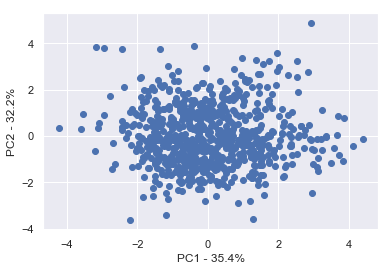

In [152]:
plt.scatter(pca_df2.PC1, pca_df2.PC2)
plt.xlabel("PC1 - {0}%".format(per_var[0]))
plt.ylabel("PC2 - {0}%".format(per_var[1]))


plt.show()

In [153]:

tsne = TSNE()
tsned =tsne.fit_transform(two)
poke_clust = cl.Kmeans(k=8)
poke_clust.fit_transform(tsned)



array([[17.5031675 , 40.69976662, 26.3782405 , ...,  2.07849614,
        23.51844638, 43.16572802],
       [18.23490753, 41.22189146, 26.23878269, ...,  1.3289303 ,
        22.97780537, 43.85378825],
       [18.80473783, 41.24292178, 25.72368238, ...,  1.0373459 ,
        22.32705911, 44.1156995 ],
       ...,
       [27.51917104, 36.1092163 , 12.60546432, ..., 13.62281359,
        13.150279  , 43.82854099],
       [28.51953945, 35.88630423, 11.41384176, ..., 14.83110864,
        12.62708167, 44.04344977],
       [15.5486737 , 29.51081655, 21.86160302, ..., 12.79937235,
        25.95705922, 33.13519695]])

In [154]:
def elbow_plot(data, iterations):
    liste = []
    for i in range(iterations):
        lib = cl.Kmeans(inits=10, method="rng", k=i+1)
        lib.fit(data)
        liste.append(lib.inertia_)
        #print(lib.inertia_)
    plt.plot(liste, "kx")
    plt.plot(liste)
    plt.xlabel("k")
    plt.ylabel("score")
    return plt.show()

In [155]:
elbow_plot()

TypeError: elbow_plot() missing 2 required positional arguments: 'data' and 'iterations'

In [156]:
plot(tsned, poke_clust.labels_, poke_clust.cluster_centers_, 8)

NameError: name 'plot' is not defined

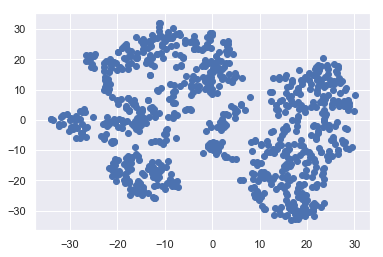

In [157]:
plt.scatter(tsned[:,0],tsned[:,1])

In [39]:
tsned.shape

(800, 2)

In [159]:
pure_sne = TSNE()
pure_sned = pure_sne.fit_transform(scaled)

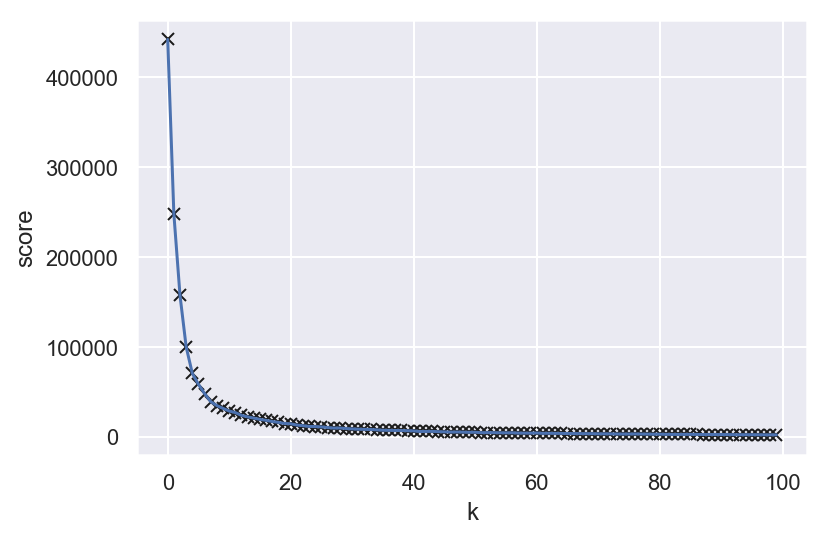

In [66]:
elbow_plot(pure_sned, 100)

In [158]:
kmean = cl.Kmeans(k = 10)
kmean.fit(pure_sned)
plot(pure_sned, kmean.labels_, kmean.cluster_centers_, 10)

NameError: name 'pure_sned' is not defined

In [43]:
tsned_with_type =pd.DataFrame(pure_sned)
tsned_with_type["Type"] = type_list
#plt.scatter(tsned_with_type.iloc[:,0],tsned_with_type.iloc[:,1], c="w")


In [44]:
types
colors_shapes = ["go","rx","bv","gx", "co", "mv","yx","g^","m*","rh","mX","kD","wo","wD","rP","ko","ys","b*"]
dict_type_color = dict(zip(types,colors_shapes))

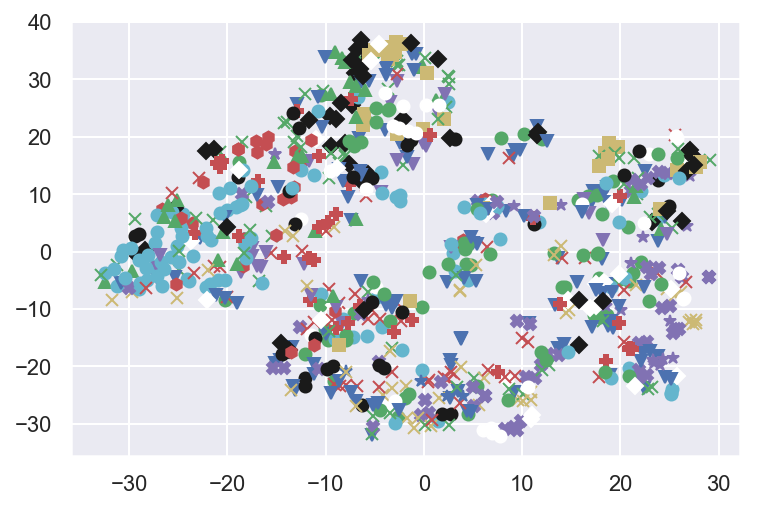

In [45]:
for i in range(tsned_with_type.shape[0]):
    color = dict_type_color[tsned_with_type.iloc[i,2]]
    plt.plot(tsned_with_type.iloc[i,0],tsned_with_type.iloc[i,1],color)

In [46]:
dict_type_color

{'Grass': 'go',
 'Fire': 'rx',
 'Water': 'bv',
 'Bug': 'gx',
 'Normal': 'co',
 'Poison': 'mv',
 'Electric': 'yx',
 'Ground': 'g^',
 'Fairy': 'm*',
 'Fighting': 'rh',
 'Psychic': 'mX',
 'Rock': 'kD',
 'Ghost': 'wo',
 'Ice': 'wD',
 'Dragon': 'rP',
 'Dark': 'ko',
 'Steel': 'ys',
 'Flying': 'b*'}

In [47]:
pkmn_red =pkmn.drop(["Legendary", "Generation"], axis=1)
pkmn_red["Cluster"] = kmean.labels_

In [48]:

for i in range(pkmn_red.shape[0]):
    pass


In [49]:
kmean.labels_.shape

(800,)

<function matplotlib.pyplot.show(*args, **kw)>

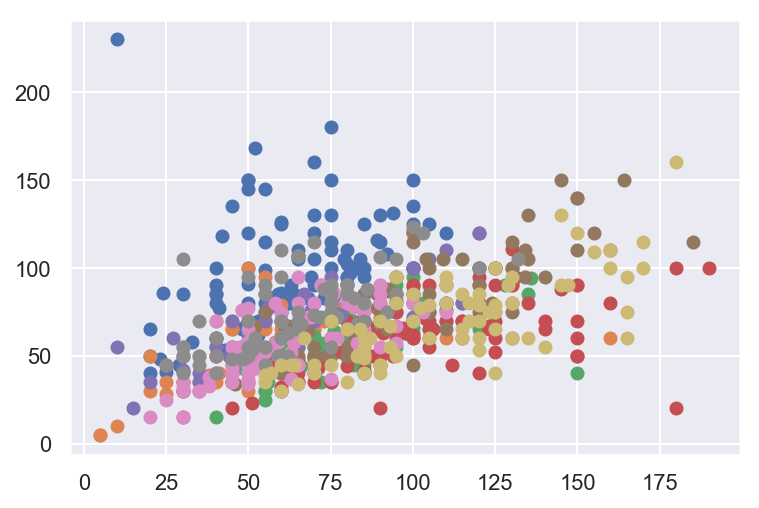

In [50]:
for i in range(9):
    Cluster0 = pkmn_red[pkmn_red.Cluster == i]
    plt.plot(Cluster0.Attack,Cluster0.Defense, "o")
plt.show

In [51]:
color = {
    0 : "b",
    1 : "g",
    2 : "r",
    3 : "c",
    4 : "m",
    5 : "y",
    6 : "k",
    7 : "w",
    8 : "b",
    9 : "g"
    
}

<function matplotlib.pyplot.show(*args, **kw)>

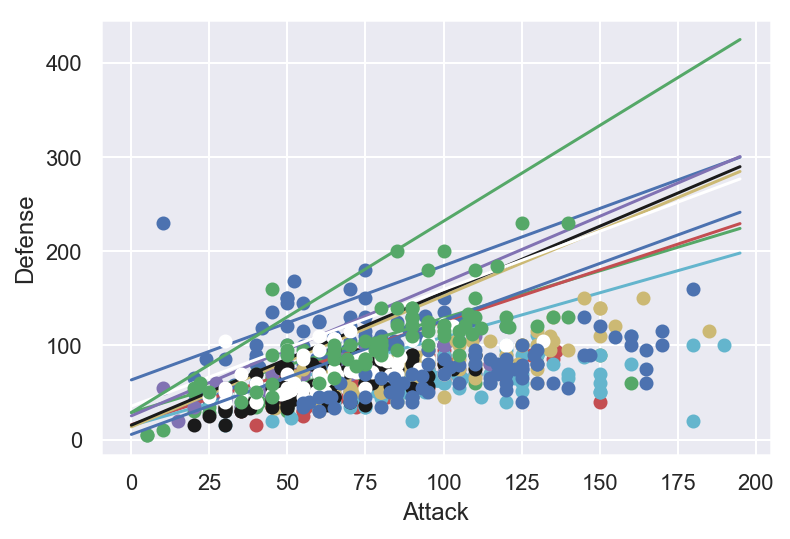

In [68]:
from sklearn.linear_model import LinearRegression

for i in range(10):
    Cluster0 = pkmn_red[pkmn_red.Cluster == i]
    linreg = LinearRegression()
    linreg.fit(np.array(Cluster0.Attack).reshape(-1, 1),np.array(Cluster0.Defense))
    
    plt.plot(Cluster0.Attack,Cluster0.Defense, "o", color= color[i])
    plt.plot(np.array((0,195)).reshape(-1, 1),linreg.predict(np.array((0,400)).reshape(-1, 1)),color= color[i])
    plt.xlabel("Attack")
    plt.ylabel("Defense")
plt.show



In [53]:
for i in range(9):
    Cluster0 = pkmn_red[pkmn_red.Cluster == i]
    print(Cluster0.Defense.mean())

99.51063829787235
57.46774193548387
56.55421686746988
61.44897959183673
69.75925925925925
78.2967032967033
57.86021505376344
75.16438356164383
69.56410256410257


In [54]:
Cluster0 = pkmn_red[pkmn_red.Cluster == 0]


In [67]:
pkmn_comparer = pkmn_red[pkmn_red.Cluster == 0].mean(axis = 0)
pkmn_final = pd.DataFrame(pkmn_comparer).T
for i in range(9):
    pkmn_red[pkmn_red.Cluster == i+1].mean(axis = 0)
    pkmn_final = pkmn_final.append(pd.DataFrame(pkmn_red[pkmn_red.Cluster == i+1].mean(axis = 0)).T)
pkmn_final.set_index("Cluster")
    

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Cluster,,,,,,,
0.0,430.585106,66.627660,61.265957,99.510638,64.468085,91.957447,46.755319
1.0,456.967742,76.467742,58.935484,57.467742,89.629032,105.161290,69.306452
2.0,389.493976,58.674699,76.397590,56.554217,51.168675,56.192771,90.506024
3.0,488.224490,79.224490,101.887755,61.448980,101.816327,62.765306,81.081633
4.0,412.629630,64.907407,64.814815,69.759259,64.685185,72.185185,76.277778
5.0,423.252747,71.769231,95.659341,78.296703,57.593407,68.010989,51.923077
6.0,436.795699,61.795699,62.086022,57.860215,92.967742,67.870968,94.215054
7.0,442.150685,72.205479,65.808219,75.164384,97.136986,81.876712,49.958904
8.0,452.923077,75.525641,108.794872,69.564103,57.538462,68.000000,73.500000


In [65]:
pkmn_red.Cluster

#
1      7
2      7
3      7
3      7
4      6
5      6
6      6
6      3
6      1
7      0
8      0
9      0
9      7
10     2
11     9
12     1
13     2
14     9
15     8
15     2
16     2
17     2
18     2
18     6
19     2
20     2
21     2
22     2
23     2
24     2
      ..
700    1
701    2
702    6
703    0
704    1
705    1
706    1
707    0
708    5
709    5
710    5
710    5
710    5
710    5
711    9
711    9
711    9
711    9
712    9
713    9
714    6
715    6
716    3
717    3
718    5
719    0
719    3
720    1
720    1
721    0
Name: Cluster, Length: 800, dtype: int64

In [56]:
pkmn_final.drop(["Cluster", "Total"], axis = 1).max(axis = 0)

HP          79.224490
Attack     108.794872
Defense     99.510638
Sp. Atk    101.816327
Sp. Def    105.161290
Speed       94.215054
dtype: float64

In [57]:
pkmn_red[pkmn_red.Cluster == 5][["Attack",]].max()

Attack    185
dtype: int64

In [58]:
test = pkmn_red[pkmn_red["Attack"] >= 185]
test[test.Cluster == 4]
test

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Cluster
#,,,,,,,,,,,
150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,3
214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,5


In [59]:
pkmn_red[pkmn_red["Cluster"] == 0]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Cluster
#,,,,,,,,,,,
7,Squirtle,Water,NaN,314,44,48,65,50,64,43,0
8,Wartortle,Water,NaN,405,59,63,80,65,80,58,0
9,Blastoise,Water,NaN,530,79,83,100,85,105,78,0
80,Slowbro,Water,Psychic,490,95,75,110,100,80,30,0
80,SlowbroMega Slowbro,Water,Psychic,590,95,75,180,130,80,30,0
86,Seel,Water,NaN,325,65,45,55,45,70,45,0
87,Dewgong,Water,Ice,475,90,70,80,70,95,70,0
102,Exeggcute,Grass,Psychic,325,60,40,80,60,45,40,0
105,Marowak,Ground,NaN,425,60,80,110,50,80,45,0


internet version

In [61]:
#@numba.jit(nopython=True) 
def k_means(data, k, number_of_iterations):
    n = len(data)
    number_of_features = data.shape[1]
    # Pick random indices for the initial centroids.
    initial_indices = np.random.choice(range(n), k)
    # We keep the centroids as |features| x k matrix.
    means = data[initial_indices].T
    # To avoid loops, we repeat the data k times depthwise and compute the
    # distance from each point to each centroid in one step in a
    # n x |features| x k tensor.
    repeated_data = np.stack([data] * k, axis=-1)
    all_rows = np.arange(n)
    zero = np.zeros([1, 1, 2])
    for _ in range(number_of_iterations):
        # Broadcast means across the repeated data matrix, gives us a
        # n x k matrix of distances.
        distances = np.sum(np.square(repeated_data - means), axis=1)
        # Find the index of the smallest distance (closest cluster) for each
        # point.
        assignment = np.argmin(distances, axis=-1)
        # Again to avoid a loop, we'll create a sparse matrix with k slots for
        # each point and fill exactly the one slot that the point was assigned
        # to. Then we reduce across all points to give us the sum of points for
        # each cluster.
        sparse = np.zeros([n, k, number_of_features])
        sparse[all_rows, assignment] = data
        # To compute the correct mean, we need to know how many points are
        # assigned to each cluster (without a loop).
        counts = (sparse != zero).sum(axis=0)
        # Compute new assignments.
        means = sparse.sum(axis=0).T / counts.clip(min=1).T
    return means.T

speed tests

In [62]:
import sklearn.cluster as sk

def time_k_plot(data, iterations, runs):
    liste = []
    sklearn_liste = []
    inet_liste = []
    for i in range(iterations):
        for j in range(runs):
            
            meantime =[]
            start = time.time()
            lib = cl.Kmeans(inits=10, method="rng", k=i+1, tol= 1)
            lib.fit(data)
            end = time.time()
            meantime.append(end-start)
            
            inet_meantime =[]
            start = time.time()
            k_means(data,i+1,300)
            end = time.time()
            inet_meantime.append(end-start)
            
            sk_meantime = []
            start = time.time()
            lib = sk.KMeans(init="random",n_init=i+1)
            lib.fit(data)
            end = time.time()
            sk_meantime.append(end-start)
        liste.append(np.mean(meantime))
        sklearn_liste.append(np.mean(sk_meantime))
        inet_liste.append(np.mean(inet_meantime))
     
    #print(lib.inertia_)
    plt.plot(liste)
    plt.plot(liste, "kx")
    plt.plot(sklearn_liste, "r")
    plt.plot(sklearn_liste, "kx")
    plt.plot(inet_liste, "g")
    plt.plot(inet_liste, "kx")
    plt.xlabel("k")
    plt.ylabel("time[s]")
    return plt.show()

def time_init_plot(data, iterations, runs):
    liste = []
    sklearn_liste = []
    
    for i in range(iterations):
        for j in range(runs):
            
            meantime =[]
            start = time.time()
            lib = cl.Kmeans(inits=i+1, method="rng", k=8,tol= 1)
            lib.fit(data)
            end = time.time()
            meantime.append(end-start)
            
            sk_meantime = []
            start = time.time()
            lib = sk.KMeans(init="random",n_init=i+1)
            lib.fit(data)
            end = time.time()
            sk_meantime.append(end-start)
        liste.append(np.mean(meantime))
        sklearn_liste.append(np.mean(sk_meantime))
     
    #print(lib.inertia_)
    plt.plot(liste)
    plt.plot(liste, "kx")
    plt.plot(sklearn_liste, "r")
    plt.plot(sklearn_liste, "kx")
    plt.xlabel("inits")
    plt.ylabel("time[s]")
    return plt.show()

/Users/benedict/Desktop/Programmieren/Bioinfoprojekt/project-04-group-04/wwdk/Cluster.py:80: RuntimeWarning: Mean of empty slice.
  self.cluster_centers_[i] = self._data[position].mean(axis = 0)
/anaconda3/envs/igem/lib/python3.6/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/benedict/Desktop/Programmieren/Bioinfoprojekt/project-04-group-04/wwdk/Cluster.py:80: RuntimeWarning: Mean of empty slice.
  self.cluster_centers_[i] = self._data[position].mean(axis = 0)
/anaconda3/envs/igem/lib/python3.6/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


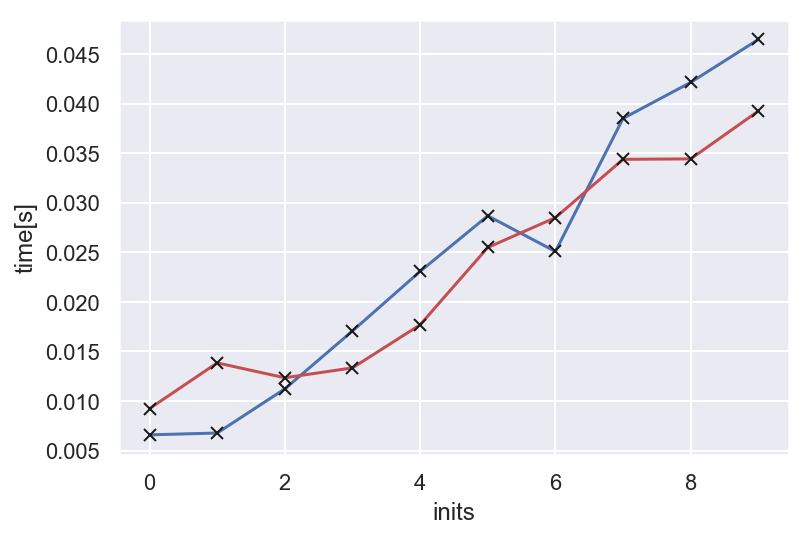

In [63]:
time_init_plot(pure_sned,10,100)

/Users/benedict/Desktop/Programmieren/Bioinfoprojekt/project-04-group-04/wwdk/Cluster.py:80: RuntimeWarning: Mean of empty slice.
  self.cluster_centers_[i] = self._data[position].mean(axis = 0)
/anaconda3/envs/igem/lib/python3.6/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/benedict/Desktop/Programmieren/Bioinfoprojekt/project-04-group-04/wwdk/Cluster.py:80: RuntimeWarning: Mean of empty slice.
  self.cluster_centers_[i] = self._data[position].mean(axis = 0)
/anaconda3/envs/igem/lib/python3.6/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/benedict/Desktop/Programmieren/Bioinfoprojekt/project-04-group-04/wwdk/Cluster.py:80: RuntimeWarning: Mean of empty slice.
  self.cluster_centers_[i] = self._data[position].mean(axis = 0)
/anaconda3/envs/igem/lib/python3.6/site

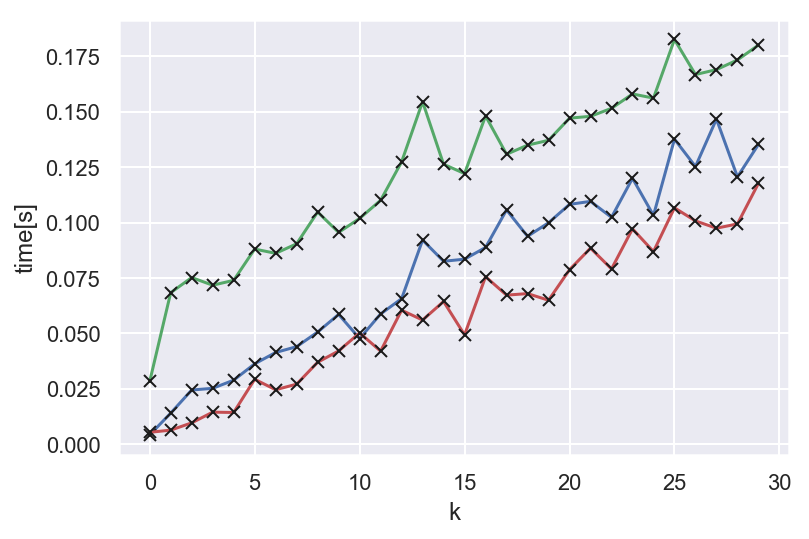

In [64]:
time_k_plot(pure_sned,30,10)


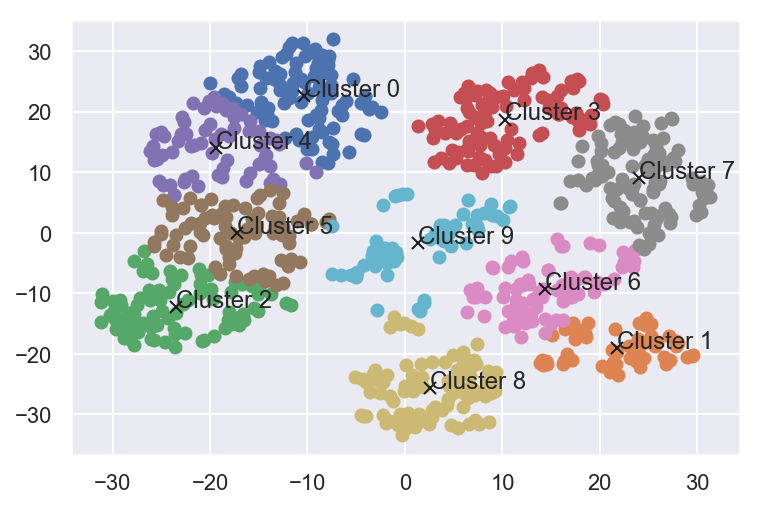

In [65]:
lib = cl.Kmeans(inits=10, method="rng", k=10, tol= 1)
lib.fit(pure_sned)
plot(pure_sned, lib.labels_, lib.cluster_centers_, 10)

### PBMC Dataset

In [563]:
from wwdk import data as d
from wwdk import cluster as cl
from wwdk import Utilities as u
import umap
from sklearn.manifold import TSNE

In [582]:
data = d.Loader("http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz")

In [77]:
#df_pbmc = data._to_df()
df_pbmc = data.process()[1]

In [85]:
df_pbmc_processed = data.process()

In [662]:
ar_data = df_pbmc_processed[1]
columns = df_pbmc_processed[2]

In [663]:
ar_data.shape

(2700, 32738)

In [664]:
ar_data[np.sum(ar_data[ar_data.columns[ar_data.columns.str.startswith("MT-") == True]],axis=1)/np.sum(ar_data,axis=1) <= 0.05]

,MIR1302-10,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,AL627309.1,RP11-34P13.14,RP11-34P13.9,AP006222.2,RP4-669L17.10,...,KIR3DL2-1,AL590523.1,CT476828.1,PNRC2-1,SRSF10-1,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1
0,,,,,,,,,,,,,,,,,,,,,
AAACATACAACCAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGAGCTAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGATCAGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGCTTCCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGTATGCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGCACTGGTAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGCTGACCAGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGCTGGTTCTT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGCTGTAGCCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [665]:
ar_data = ar_data[np.sum(ar_data[ar_data.columns[ar_data.columns.str.startswith("MT-") == True]],axis=1)/np.sum(ar_data,axis=1) <= 0.05]

In [666]:
ar_data.shape

(2643, 32738)

In [667]:
ar_data = ar_data.T[(ar_data.astype(bool).sum(axis=0) > 3)].T

In [668]:
ar_data.shape

(2643, 13006)

In [669]:
normalized_data = preprocessing.normalize(ar_data)

In [676]:
pca = PCA(n_components=40)
pcad = pca.fit_transform(normalized_data)
per_var = np.round(pca.explained_variance_ratio_*100, decimals= 1)
#pcad_log = pca.fit_transform(scaled_log_data)
labels = ["PC" + str(x) for x in range(1,len(per_var)+1)]

In [679]:
pca_df = pd.DataFrame(pcad, columns= labels )


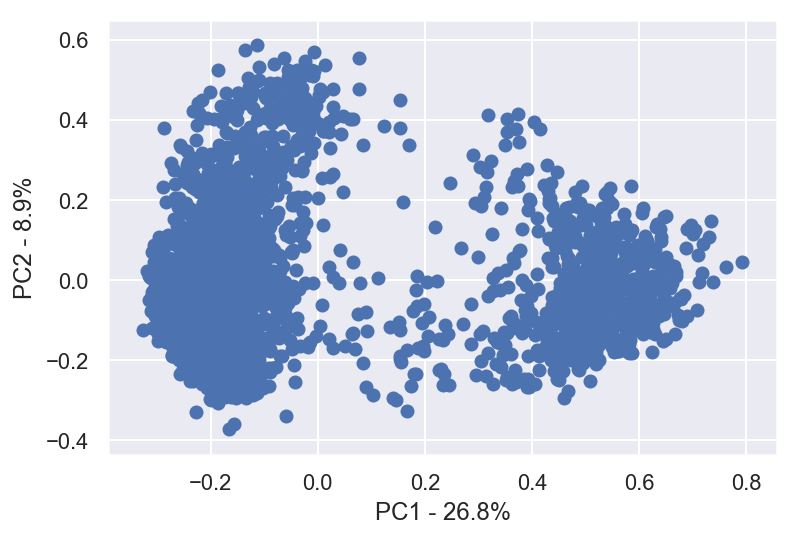

In [680]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel("PC1 - {0}%".format(per_var[0]))
plt.ylabel("PC2 - {0}%".format(per_var[1]))
pbmc_red = pca_df.values
pca_fourty = pca_df.T[0:40].T

In [682]:
umap_on_pca = umap.UMAP(n_neighbors=10)
processed_data = umap_on_pca.fit_transform(pbmc_red)
#processed_log_data = tsned.fit_transform(pcad_log)

/anaconda3/envs/igem/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


/anaconda3/envs/igem/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


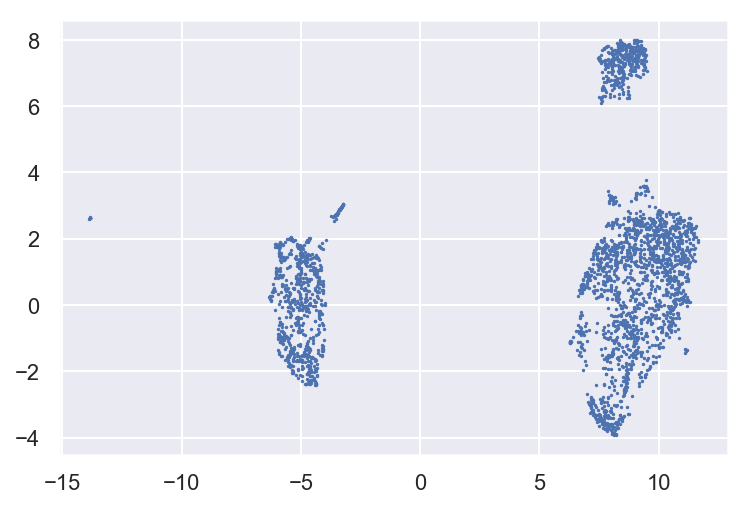

In [681]:
standard_embedding = umap.UMAP(n_neighbors=10).fit_transform(pca_fourty)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], s=0.5, cmap='Spectral');

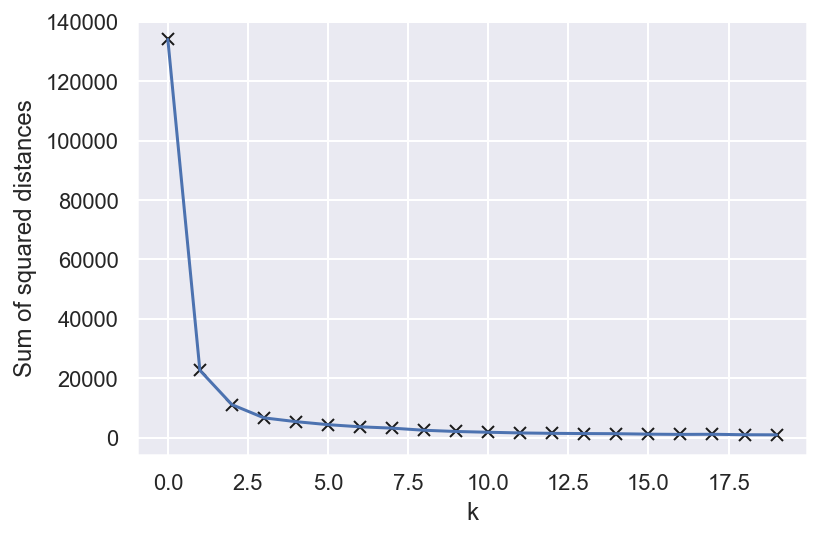

In [684]:
u.elbow_plot(processed_data, 20)
#u.elbow_plot(processed_log_data,20)


In [687]:
kmeans = cl.Kmeans(k=7)
#kmeans_log = cl.Kmeans(k=8)

kmeans.fit(processed_data)
#kmeans_log.fit(processed_log_data)
#kmeans.cluster_centers_
#kmeans._data

Kmeans(inits=None, k=None, maxit=None, method=None, tol=None)

In [341]:
mb_kmean = cl.MiniBatchKMeans()
mb_kmean.fit(processed_data)

MiniBatchKMeans(batch_size=None, inits=None, k=None, max_iterations=None,
        method=None, tol=None)

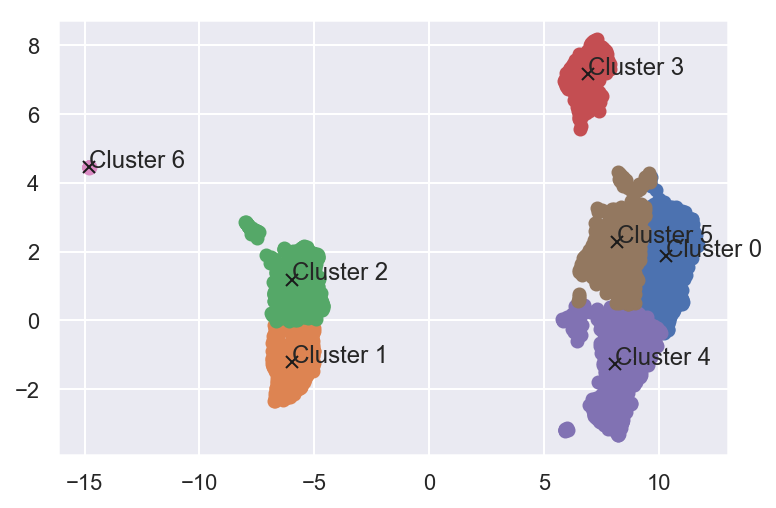

In [688]:
u.plot(kmeans)
#u.plot(mb_kmean)

In [689]:
clusters = kmeans.labels_
ar_data["Cluster"] = clusters

In [690]:
comparer_ar_data = ar_data[ar_data.Cluster ==0].mean(axis = 0)
final_comparer = pd.DataFrame(comparer_ar_data).T
for i in range(6):
    ar_data[ar_data.Cluster == i+1].mean(axis = 0)
    final_comparer = final_comparer.append(pd.DataFrame(ar_data[ar_data.Cluster == i+1].mean(axis = 0)).T)
final_comparer = final_comparer.set_index("Cluster")

In [691]:
gene_names = final_comparer.T.index

In [571]:
final_comparer.shape

(10, 13006)

In [692]:
final_comparer[final_comparer <= 20]

,AL627309.1,RP11-206L10.2,LINC00115,NOC2L,KLHL17,PLEKHN1,HES4,RP11-54O7.11,ISG15,AGRN,...,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC145212.1,AL592183.1,AL354822.1,PNRC2-1,SRSF10-1
Cluster,,,,,,,,,,,,,,,,,,,,,
0.0,0.001608,0.000000,0.003215,0.107717,0.001608,0.004823,0.006431,0.000000,0.900322,0.000000,...,0.180064,5.400322,0.967846,0.133441,4.618971,0.003215,0.136656,0.000000,0.051447,0.038585
1.0,0.003663,0.000000,0.010989,0.139194,0.007326,0.000000,0.633700,0.003663,3.131868,0.003663,...,0.175824,6.069597,1.347985,0.109890,4.904762,0.021978,0.109890,0.007326,0.040293,0.036630
2.0,0.012563,0.005025,0.007538,0.077889,0.002513,0.005025,0.067839,0.002513,2.316583,0.015075,...,0.170854,4.821608,1.087940,0.143216,4.535176,0.007538,0.113065,0.005025,0.032663,0.007538
3.0,0.000000,0.006042,0.009063,0.108761,0.000000,0.000000,0.012085,0.006042,0.486405,0.000000,...,0.145015,4.619335,0.555891,0.060423,3.468278,0.006042,0.172205,0.006042,0.027190,0.024169
4.0,0.001961,0.000000,0.005882,0.123529,0.003922,0.003922,0.003922,0.000000,0.947059,0.000000,...,0.149020,4.649020,0.762745,0.113725,3.941176,0.003922,0.143137,0.000000,0.047059,0.025490
5.0,0.002008,0.002008,0.008032,0.102410,0.004016,0.000000,0.004016,0.000000,0.451807,0.002008,...,0.170683,4.935743,0.624498,0.096386,4.363454,0.004016,0.144578,0.004016,0.052209,0.024096
6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,...,0.090909,0.818182,0.272727,0.000000,1.727273,0.090909,0.000000,0.000000,0.000000,0.000000


In [694]:
for i in range(7):
    print(final_comparer[final_comparer.index == i].T.nlargest(n=5,columns=i))
    

Cluster        0.0
MALAT1   61.107717
B2M      51.340836
TMSB4X   47.093248
RPL10    44.358521
RPL13A   39.866559
Cluster         1.0
FTL      121.304029
FTH1      93.443223
TMSB4X    88.542125
B2M       53.249084
MALAT1    42.036630
Cluster        2.0
FTL      70.869347
TMSB4X   57.412060
LYZ      55.032663
FTH1     47.771357
S100A9   35.175879
Cluster        3.0
MALAT1   51.120846
RPL13A   29.981873
RPL10    28.344411
CD74     27.655589
B2M      27.419940
Cluster        4.0
MALAT1   71.390196
B2M      64.976471
TMSB4X   43.454902
RPL10    22.619608
RPL13A   20.494118
Cluster        5.0
MALAT1   90.833333
B2M      35.859438
RPL13    35.592369
RPL10    35.269076
TMSB4X   33.142570
Cluster        6.0
TMSB4X   67.000000
PPBP     44.181818
ACTB     35.545455
B2M      26.181818
PF4      18.454545


In [581]:
plt.plot(ar_data[ar_data.Cluster ==4].T, "o")

Error in callback <function flush_figures at 0x11e1dc488> (for post_execute):


KeyboardInterrupt: 

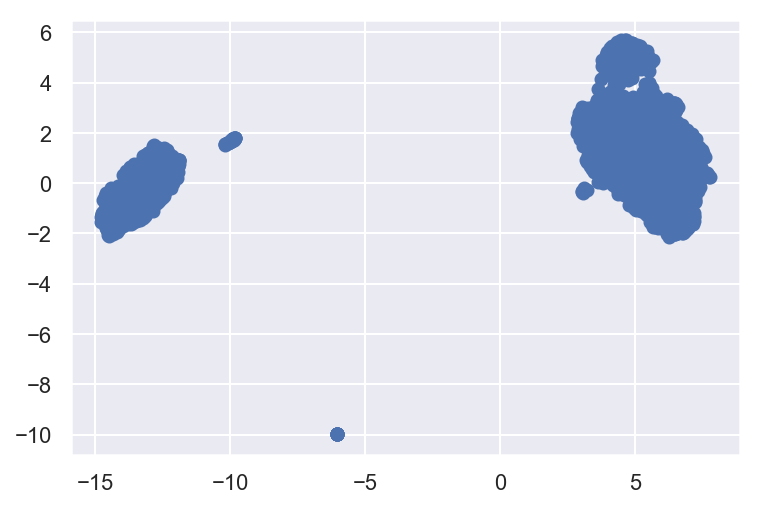

In [574]:
plt.scatter(processed_data[:,0],processed_data[:,1])


In [575]:
(np.max(final_comparer[final_comparer.index == 0].T,axis=0))

Cluster
0.0    101.241636
dtype: float64

In [ ]:
def plot(data):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i in range(data._k):
        graph = pd.DataFrame(data._data[np.argwhere(data.labels_ == i)].squeeze())
        center = pd.DataFrame(data.cluster_centers_[i]).T
        #print("Cluster"+ str(i) +  " -- Assigned Points \n" + str(graph))
        ax.plot(graph[0], graph[1], "o")
        ax.plot(center[0],center[1], "kx")
        ax.annotate("Cluster " + str(i), xy = (center[0],center[1])
            )
    plt.show

In [ ]:
plot(lib)

In [94]:
lib._data

array([[ 2.9669628, 20.836678 ],
       [ 2.3717961, 21.325884 ],
       [ 1.7109607, 21.315344 ],
       ...,
       [-8.903783 ,  9.975529 ],
       [-9.638498 ,  8.898414 ],
       [ 3.334112 , 10.286036 ]], dtype=float32)

/Users/benedict/Desktop/Programmieren/Bioinfoprojekt/project-04-group-04/wwdk/Cluster.py:80: RuntimeWarning: Mean of empty slice.
  self.cluster_centers_[i] = self._data[position].mean(axis = 0)
/anaconda3/envs/igem/lib/python3.6/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


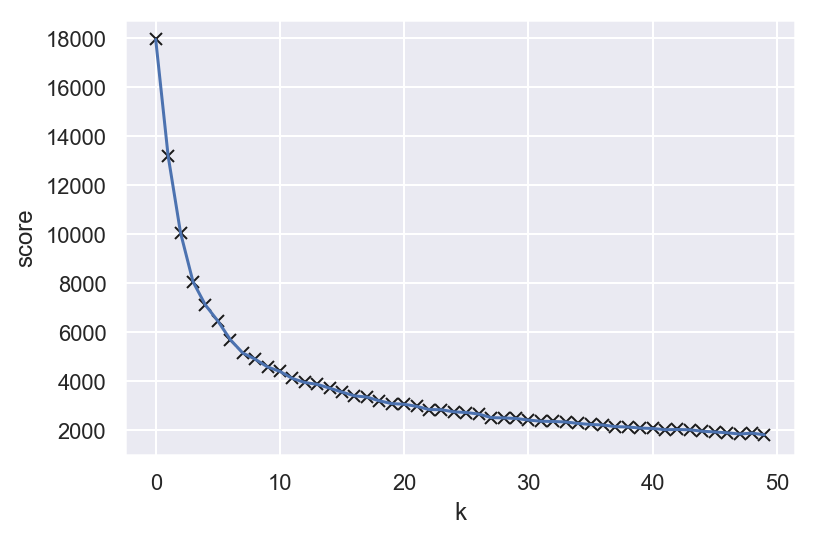

In [93]:
u.elbow_plot(pure_sned, 50)

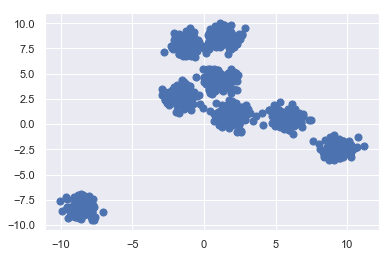

In [90]:
X, y_true = make_blobs(n_samples=1000, centers=8,
                       cluster_std=0.60, random_state=0, )
plt.scatter(X[:, 0], X[:, 1], s=50)

In [185]:
import imageio
import shutil
import os
class Gifcreator(BaseEstimator, ClusterMixin, TransformerMixin):               
    """Performs native k-means on a set of input data """
    def __init__(self, inits=10, k=8, maxit=300, method="++", tol = 1e-3):
 
        self.labels_ = None
        self.cluster_centers_ = None
        self.inits = inits
        self._k = k
        self._maxit = maxit
        self._method = method
        self._tol = tol
       
    """fits given data and calculates cluster centers and labels points accordingly"""

    def create_gif(self,data):
        os.mkdir("./plots")
        filenames = []
        self._data = data
        best_clust = float('inf')
        
        
        error = False
        for c in (range(self.inits)):
            if error == True:
                break
            """random points from the dataset are selected as starting centers """
            if self._method == "rng": # random centers are choosen
                
                dot = np.random.choice(self._data.shape[0], self._k, replace=False)
                self.cluster_centers_ = self._data[dot]
            elif self._method == "++": # kmeans++ is initiated
                clusters = np.zeros((self._k, self._data.shape[1]))
                dot = np.random.choice(len(self._data), replace=False) # one random center
                clusters[0] = self._data[dot]
                exp_clusters = np.expand_dims(clusters, axis=1)
                exp_data = np.expand_dims(self._data, axis=0) # clusters and data are expanded to be easily substracted in a next step
                for i in range (self._k - 1): #the rest of the centers are chosen based on the first one
                    D = np.min(np.sum(np.square(exp_clusters[0:i + 1] - exp_data), axis=2), axis=0)
                    r = np.random.random()
                    ind = np.argwhere(np.cumsum(D / np.sum(D)) >= r)[0][0] # the point when the cummulative sum is equal to r is choosen as ind
                    clusters[i + 1] = self._data[ind]
                self.cluster_centers_ = clusters
            else:
                raise AttributeError("No valid method")

            old_centroids = None

            for i in range(self._maxit):
                #plt.scatter(X[:, 0], X[:, 1],c="w", s=50)
                for ie in range(self._k):
                    graph = pd.DataFrame(self._data[np.argwhere(self.labels_ == ie)].squeeze())
                    center = pd.DataFrame(self.cluster_centers_[ie]).T
                    plt.plot(graph[0], graph[1], "o")
                    plt.plot(center[0],center[1], "kx")
               
                #print(i)
                plt.savefig("./plots/graph" +str(c+1)+"-"+ str(i+1)+ ".png")
                filenames.append("./plots/graph" +str(c+1)+"-"+ str(i+1)+ ".png")
                plt.clf()
                
                
                old_centroids = self.cluster_centers_.copy()
                clusters = np.expand_dims(self.cluster_centers_, axis=1)
                data = np.expand_dims(self._data, axis=0)
                eucl = np.linalg.norm(clusters-data, axis=2) # euclidean dist by using integrated numpy function
                self.labels_ = np.argmin(eucl, axis=0)
                
               # print(i)
                #print(self.cluster_centers_)
                #print(self.labels_)
                #if i > 30:
                  #  error = True
                 #   break
                for i in range(self._k): # range of clusters
                    position = np.where(self.labels_ == i) # position im array bestimmen und dann die entspechenden punkte aus data auslesen
                    
                        
                        
                    try:
                        self.cluster_centers_[i] = self._data[position].mean(axis=0)
                    except RuntimeWarning:
                        self.cluster_centers_[i] = self._data[np.random.choice(self._data.shape[0], 1, replace=False)]
                        print("Error")
                    #out = pd.DataFrame(data[np.argwhere(dist == i)].squeeze())
                overall_quality = np.sum(np.min(eucl.T, axis=1))
                if overall_quality < best_clust:
                    best_clust = overall_quality
                    best_dist = self.labels_
                    best_centers = self.cluster_centers_
                if np.linalg.norm(self.cluster_centers_ - old_centroids) < self._tol:
                    break
            self.cluster_centers_ = best_centers
            self.labels_ = best_dist
            self.inertia_ = best_clust
            images = []
            
        for filename in filenames:
            images.append(imageio.imread(filename))
            imageio.mimsave('./kmeans.gif', images)
                
        shutil.rmtree("./plots")
        print("Gif created!")
            
        return self 


In [187]:
km_ot = Gifcreator(method="++", inits=2)
filenames = km_ot.create_gif(X)
#import imageio
#images = []
#for filename in filenames:
#    images.append(imageio.imread(filename))
#imageio.mimsave('plots/kmeans.gif', images)

Gif created!


<Figure size 432x288 with 0 Axes>

![SegmentLocal](./kmeans.gif "segment")

In [180]:
import os
os.mkdir("./plots")

In [179]:
import shutil
shutil.rmtree("./plots")

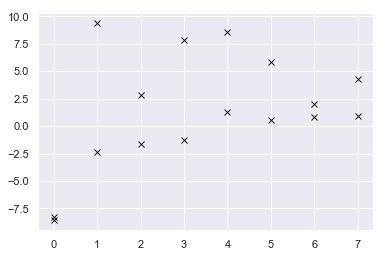

In [92]:
plt.plot(km_ot.cluster_centers_, "kx")

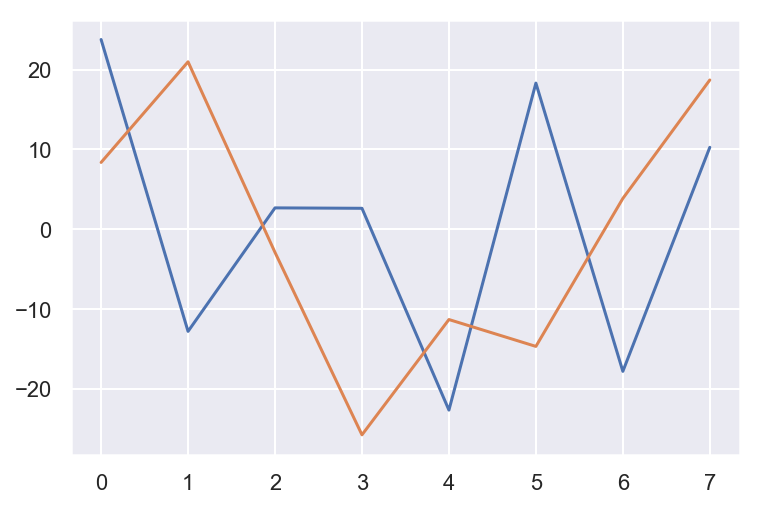

In [103]:
center = pd.DataFrame(km_ot.cluster_centers_).T
plt.plot(km_ot.cluster_centers_)
for i in range(data._k):
        
        center = pd.DataFrame(data.cluster_centers_[i]).T
        plt.plot(center[0],center[1], "kx")

In [239]:
 blubb=np.array([[-8.58705983, -8.30266872],
                 [ 9.40719151, -2.38378847],
                 [-4.62635625, -1.89775171],
                 [-1.24471881,  7.87295581],
                 [-1.50732437,  2.74657635],
                 [ 1.32582319,  8.59336818],
                 [ 4.13011558,  0.65478785],
                 [ 0.97744897,  4.05857263]])
    
blubb2 = np.array([[-8.58705983, -8.30266872],
 [ 9.40719151, -2.38378847],
 [-4.62635625 ,-1.89775171],
 [-1.24471881  ,7.87295581],
 [-1.50732437  ,2.74657635],
 [ 1.32582319  ,8.59336818],
 [ 4.13011558  ,0.65478785],
 [ 0.97744897  ,4.05857263]])

In [219]:
range(len(km_ot._data))

range(0, 1000)

In [251]:
km_ot._data[np.random.choice(km_ot._data.shape[0], 1, replace=False)]

array([[0.75726911, 8.01900287]])

### PBMC: a different attempt

In [594]:
from wwdk import data as d
from wwdk import cluster as cl
from wwdk import Utilities as u
import umap
from sklearn.manifold import TSNE
import scanpy as sc
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

scanpy==1.4.1 anndata==0.6.19 numpy==1.16.2 scipy==1.2.1 pandas==0.24.2 scikit-learn==0.20.3 statsmodels==0.9.0 


In [699]:
data_pbmc = d.Loader("http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz")

... reading from cache file cache/filtered_gene_bc_matrices-hg19-matrix.h5ad


In [700]:
data.matrix.var_names_make_unique()
adata = data.matrix


In [701]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 19024 genes that are detected in less than 3 cells


In [702]:
mito_genes = adata.var_names.str.startswith('MT-')
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

In [703]:
adata = adata[adata.obs['n_genes'] < 2500, :]
adata = adata[adata.obs['percent_mito'] < 0.05, :]
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var['highly_variable']]
sc.pp.regress_out(adata, ['n_counts', 'percent_mito'])
sc.pp.scale(adata, max_value=10)

--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
regressing out ['n_counts', 'percent_mito']
    sparse input is densified and may lead to high memory use
    finished (0:00:06.40)


In [704]:
reduced_data = adata._X

In [705]:
reduced_data

array([[-0.17146961, -0.2808123 , -0.04667677, ..., -0.09826882,
        -0.20909514, -0.5312033 ],
       [-0.21458237, -0.3726533 , -0.05480441, ..., -0.266844  ,
        -0.31314585, -0.5966543 ],
       [-0.3768877 , -0.29508457, -0.05752748, ..., -0.15865593,
        -0.17087644,  1.3789997 ],
       ...,
       [-0.20708963, -0.25046423, -0.04639698, ..., -0.05114425,
        -0.16106428,  2.041497  ],
       [-0.1903285 , -0.22633381, -0.04399936, ..., -0.00591774,
        -0.13521305, -0.48211107],
       [-0.33378938, -0.25358775, -0.0527156 , ..., -0.07842437,
        -0.13032718, -0.47133783]], dtype=float32)

In [706]:
pca = PCA()
pcae = pca.fit_transform(reduced_data)
per_var = np.round(pca.explained_variance_ratio_*100, decimals= 1)
#pcad_log = pca.fit_transform(scaled_log_data)
labels = ["PC" + str(x) for x in range(1,len(per_var)+1)]

In [707]:
pca_df = pd.DataFrame(pcae, columns= labels )
pca_fourty = pca_df.T[0:40].T

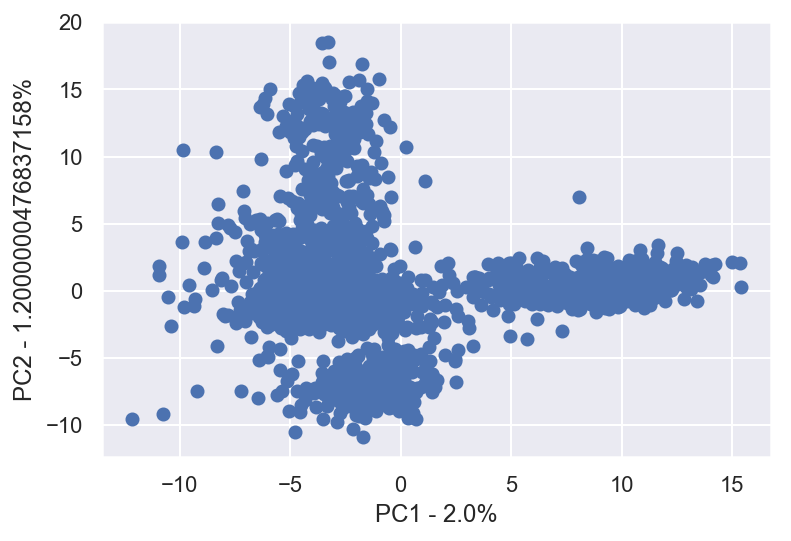

In [708]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel("PC1 - {0}%".format(per_var[0]))
plt.ylabel("PC2 - {0}%".format(per_var[1]))
pbmc_red = pca_df.values

In [709]:
umap_on_pca = umap.UMAP()
processed_data = umap_on_pca.fit_transform(pbmc_red)

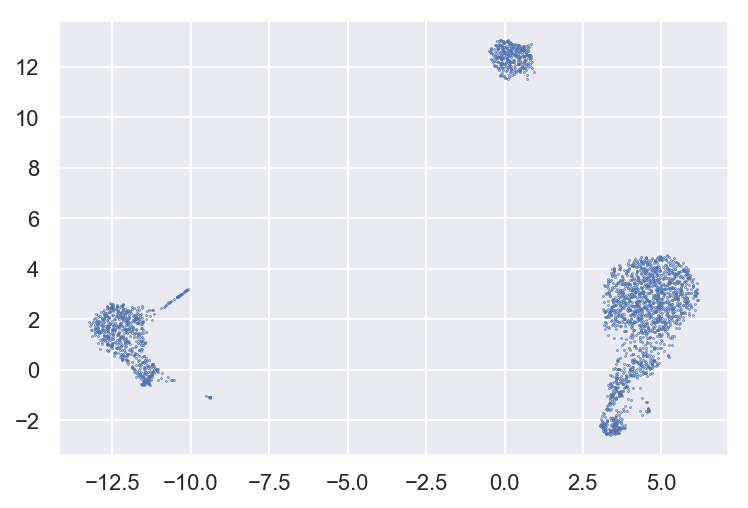

In [710]:
standard_embedding = umap.UMAP(n_neighbors=10).fit_transform(pca_fourty)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], s=0.1, cmap='Spectral');

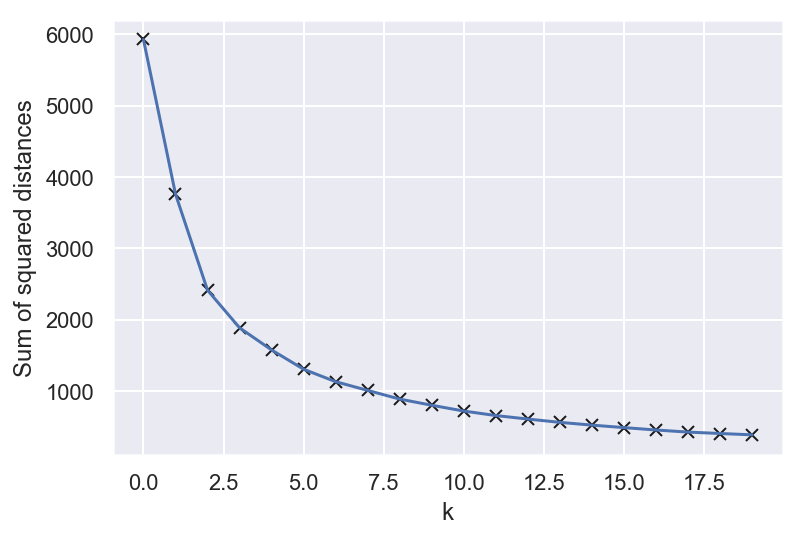

In [711]:
u.elbow_plot(processed_data,20)

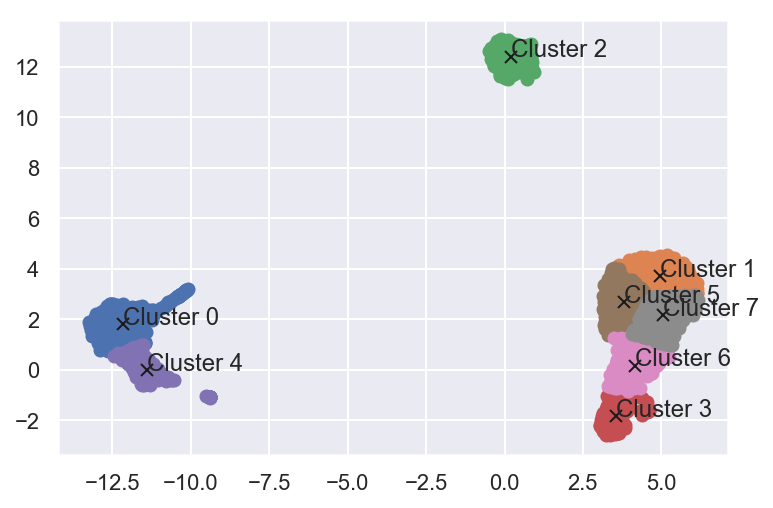

In [723]:
kmeans = cl.Kmeans()
kmeans.fit(standard_embedding)
u.plot(kmeans)

In [719]:
data_pbmc = d.Loader("http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz")
data_pbmc

... reading from cache file cache/filtered_gene_bc_matrices-hg19-matrix.h5ad


In [727]:
data_pbmc.matrix.var_names_make_unique()
pbmc_df = adata.to_df()

,MIR1302-10,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,AL627309.1,RP11-34P13.14,RP11-34P13.9,AP006222.2,RP4-669L17.10,...,KIR3DL2-1,AL590523.1,CT476828.1,PNRC2-1,SRSF10-1,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1
0,,,,,,,,,,,,,,,,,,,,,
AAACATACAACCAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGAGCTAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGATCAGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGCTTCCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGTATGCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGCACTGGTAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGCTGACCAGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGCTGGTTCTT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGCTGTAGCCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [728]:
clusters = kmeans.labels_
pbmc_df["Cluster"] = clusters

In [729]:
comparer_ar_data = pbmc_df[pbmc_df.Cluster ==0].mean(axis = 0)
final_comparer = pd.DataFrame(comparer_ar_data).T
for i in range(6):
    pbmc_df[pbmc_df.Cluster == i+1].mean(axis = 0)
    final_comparer = final_comparer.append(pd.DataFrame(pbmc_df[pbmc_df.Cluster == i+1].mean(axis = 0)).T)
final_comparer = final_comparer.set_index("Cluster")

In [730]:
for i in range(7):
    print(final_comparer[final_comparer.index == i].T.nlargest(n=5,columns=i))
    

Cluster       0.0
S100A8   1.790335
LGALS2   1.744003
CST3     1.567060
FCN1     1.547630
TYROBP   1.478353
Cluster             1.0
RP11-291B21.2  0.544864
LDLRAP1        0.470773
SCGB3A1        0.447746
TRABD2A        0.423762
MAL            0.416294
Cluster        2.0
CD79A     2.276928
MS4A1     2.066639
CD79B     1.951532
HLA-DQA1  1.919676
HLA-DQB1  1.822052
Cluster       3.0
GZMB     2.795245
FGFBP2   2.572767
PRF1     2.466847
GNLY     2.427122
NKG7     2.388421
Cluster       4.0
FCGR3A   1.759945
IFITM3   1.634992
LST1     1.498539
FCER1G   1.425117
AIF1     1.376736
Cluster       5.0
IL32     0.567625
LTB      0.553291
CD2      0.457241
AQP3     0.375964
TNFRSF4  0.354669
Cluster       6.0
GZMK     1.910545
CCL5     1.650780
NKG7     1.297305
CST7     1.254429
GZMA     1.252716


In [4]:
from wwdk import utilities as u


In [5]:
gif = u.Gifcreator(inits=10)

In [6]:
gif.create_gif(X)

Init: 0
Init: 1
Init: 2
Init: 3
Init: 4
Init: 5
Init: 6
Init: 7
Init: 8
Init: 9
Gif created!


Gifcreator(inits=10, k=8, maxit=300, method='++', tol=0.001)

<Figure size 432x288 with 0 Axes>

![SegmentLocal](./kmeans.gif "segment")